In [15]:
# Энэ хэсэгт бидэнд хэрэгтэй бүх сангуудыг дуудаж байна.
import networkx as nx          # Граф, сүлжээний шинжилгээнд зориулсан сан
import warnings               # Анхааруулга мессежүүдийг хянахад хэрэглэнэ
import pandas as pd           # Өгөгдөл боловсруулахад хэрэглэдэг гол сан
import numpy as np            # Тоон тооцоолол хийхэд зориулсан сан
import matplotlib.pyplot as plt # График зурахад хэрэглэдэг сан
import powerlaw              # Хүчний хуулийн шинжилгээнд зориулсан сан
warnings.filterwarnings('ignore')  # Анхааруулга мессежүүдийг харуулахгүй болгох

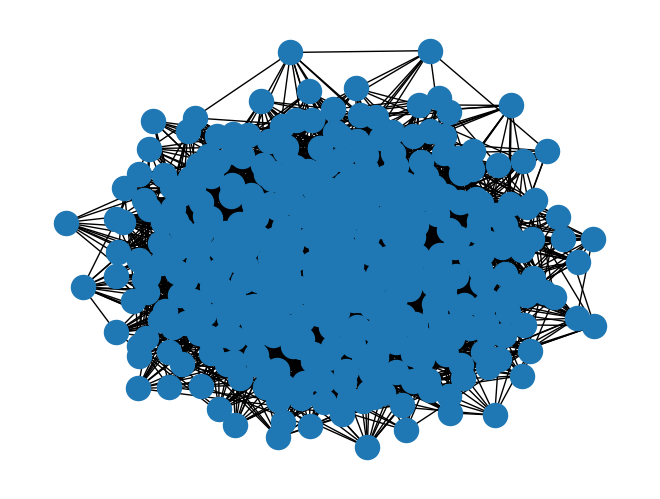

In [16]:
# Эндээ Эрдөш-Реньи загварын граф үүсгэж байна
er = nx.erdos_renyi_graph(400, 0.05)  # 400 оройтой, ирмэг үүсэх магадлал 0.05
nx.draw(er)                           # Графыг зурж харуулах

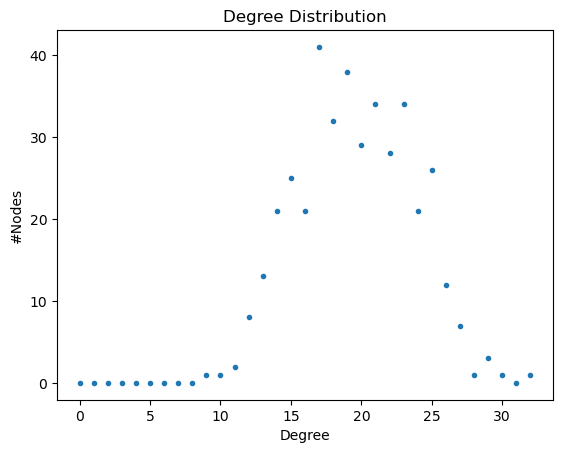

In [17]:
# Одоо зэрэглэлийн тархалтыг тооцоолъё
hist = nx.degree_histogram(er)        # Зэрэглэлийн давтамжийг тооцоолох
plt.plot(range(0, len(hist)), hist, ".")  # Цэгэн график байдлаар зурах
plt.title("Degree Distribution")      # Графикийн гарчиг
plt.xlabel("Degree")                  # Х тэнхлэгийн нэр
plt.ylabel("#Nodes")                  # У тэнхлэгийн нэр
plt.show()                           # Графикийг харуулах

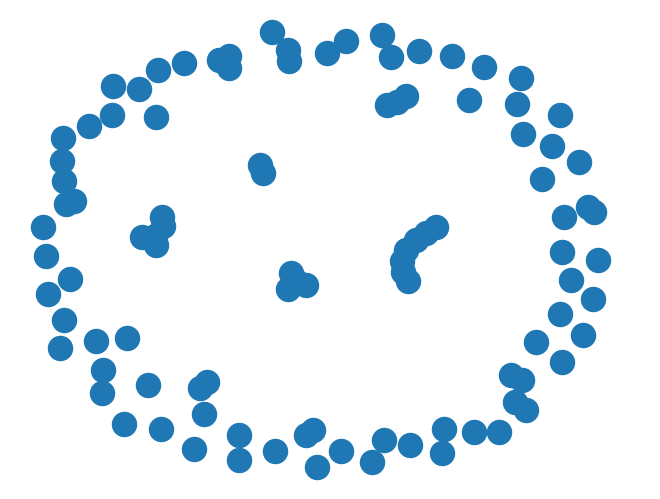

In [18]:
# Доор Er графын дөрвөн төрлийн дэд бүлгийг үүсгэж үзүүлье
# Эхлээд критикаас доош байх үеийн граф
er_sub = nx.erdos_renyi_graph(100, 0.005)  # 100 орой, бага магадлалтай
nx.draw(er_sub)                             # Графыг зурж харуулах

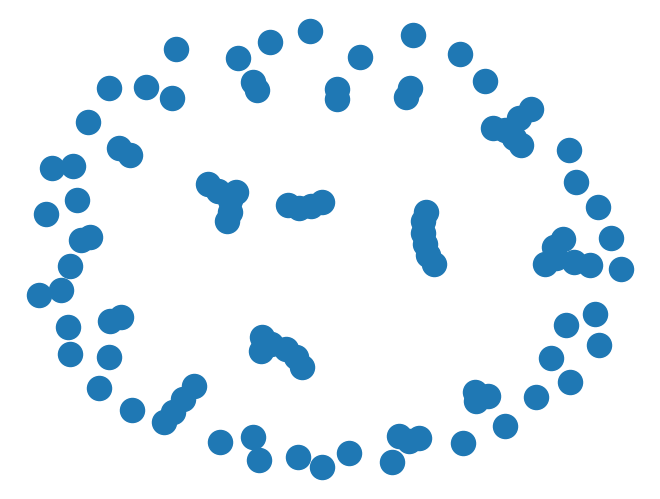

In [19]:
# Критик үеийн граф
er_crit = nx.erdos_renyi_graph(100, 0.01)  # 100 орой, критик магадлалтай
nx.draw(er_crit)                        # Графыг зурж харуулах

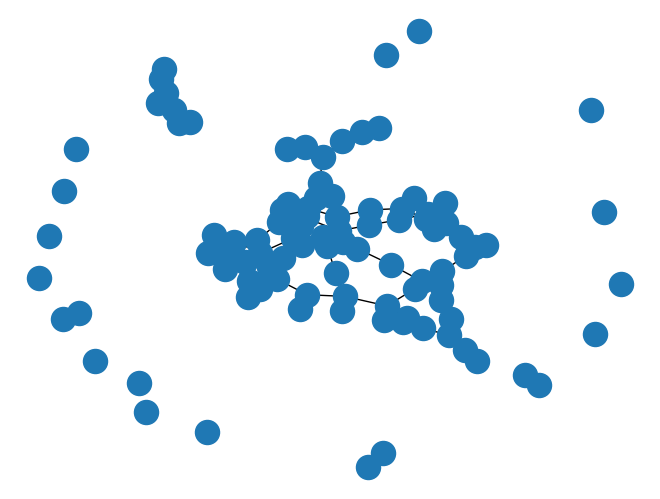

In [20]:
# Критикаас дээш үеийн граф
er_super = nx.erdos_renyi_graph(100, 0.02)  # 100 орой, өндөр магадлалтай
nx.draw(er_super)                           # Графыг зурж харуулах

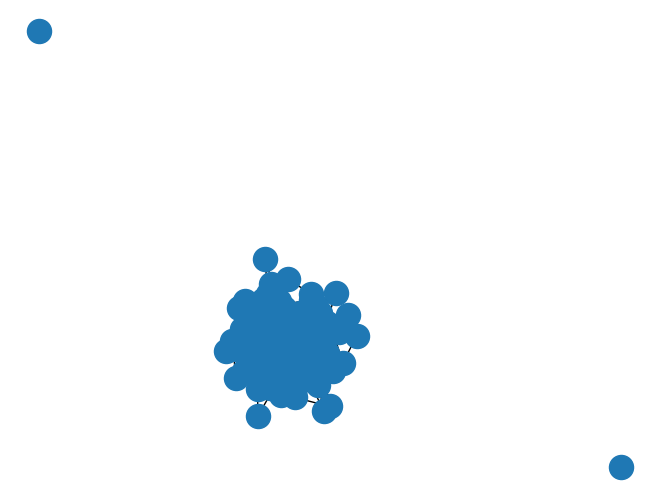

In [21]:
# Бүрэн холбоост граф
er_conn = nx.erdos_renyi_graph(100, 0.06)   # 100 орой, маш өндөр магадлалтай
nx.draw(er_conn)                             # Графыг зурж харуулах

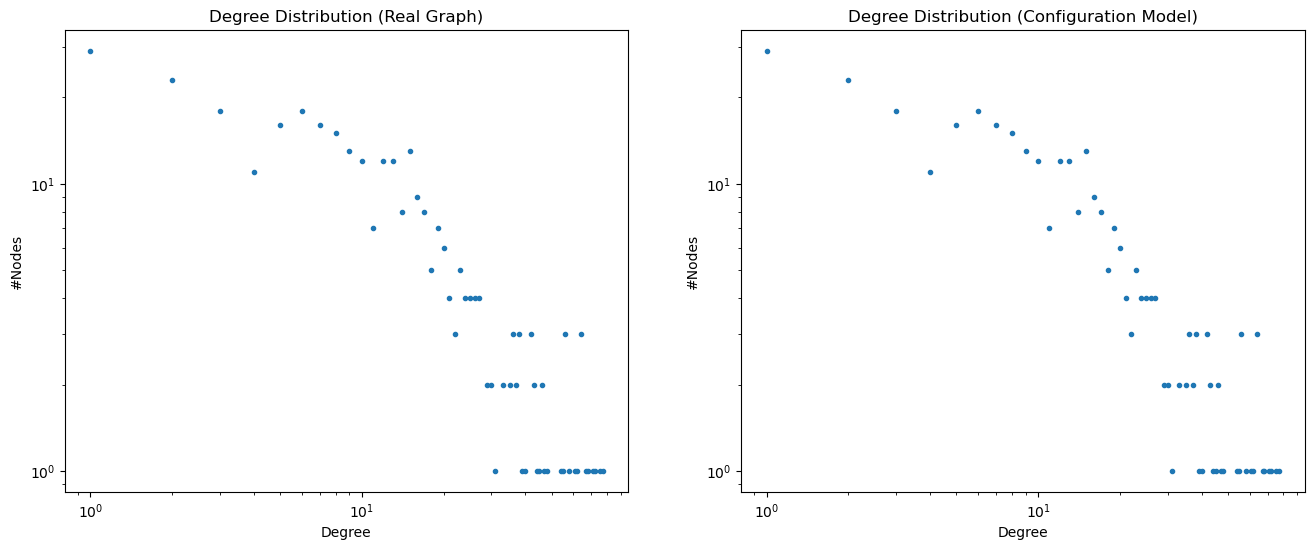

In [22]:
# Одоо конфигурацийн загвар дээр ажиллана.
# CSV файлаас бодит сүлжээний өгөгдлийг уншиж авах
g = nx.read_edgelist("network.csv", delimiter=",", nodetype=int)  # Файлаас граф унших
sequence = [i[1] for i in g.degree()]                            # Зэрэглэлийн дараалал авах
cm = nx.configuration_model(sequence)                            # Конфигурацийн загвар үүсгэх

# Бодит ба загварын графуудын зэрэглэлийн тархалтыг харьцуулъя
hist_o = nx.degree_histogram(g)    # Бодит графын зэрэглэлийн тархалт
hist_cm = nx.degree_histogram(cm)  # Загварын графын зэрэглэлийн тархалт

# Харьцуулсан графикуудыг зурах
fig = plt.figure(figsize=(16, 6))              # 16x6 хэмжээтэй график үүсгэх
plt.subplot(1, 2, 1)                           # Зүүн талын дэд график
plt.plot(range(0, len(hist_o)), hist_o, ".")   # Бодит графын тархалтыг зурах
plt.title("Degree Distribution (Real Graph)")   # Гарчиг
plt.xlabel("Degree")                           # Х тэнхлэгийн нэр
plt.ylabel("#Nodes")                           # У тэнхлэгийн нэр
plt.loglog()                                   # Логарифм координат систем

plt.subplot(1, 2, 2)                           # Баруун талын дэд график
plt.plot(range(0, len(hist_cm)), hist_cm, ".") # Загварын графын тархалтыг зурах
plt.title("Degree Distribution (Configuration Model)")  # Гарчиг
plt.xlabel("Degree")                           # Х тэнхлэгийн нэр
plt.ylabel("#Nodes")                           # У тэнхлэгийн нэр
plt.loglog()                                   # Логарифм координат систем

plt.show()                                # Графикийг харуулах